In [7]:
%config IPCompleter.greedy = True
from sklearn import datasets
data = datasets.load_iris()

In [8]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
data.target #0 = Setosa 1 = Versicolour 2 = Virginica

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

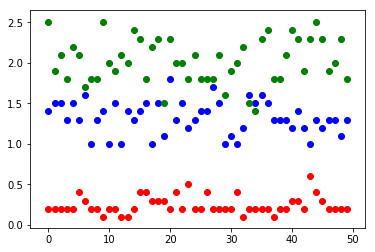

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
x = range(50)
plt.scatter(x,data.data[:50,3],color='red') #petal width  of Setosa
plt.scatter(x,data.data[50:100,3],color='blue') #petal width  of Versicolour 
plt.scatter(x,data.data[100:,3],color='green') #petal width  of Virginica

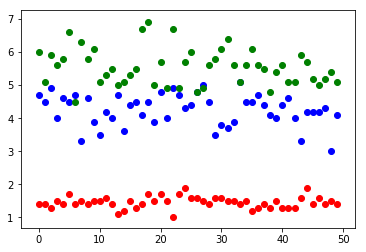

In [23]:
plt.scatter(x,data.data[:50,2],color='red') #petal length of Setosa
plt.scatter(x,data.data[50:100,2],color='blue') #petal length of Versicolour 
plt.scatter(x,data.data[100:,2],color='green') #petal length of Virginica

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data[:,2:4], data.target, test_size=0.2, random_state=42,stratify=data.target)
print('Train Shape X: {} Y : {}'.format(X_train.shape,y_train.shape))
print('Test Shape X: {} Y : {}'.format(X_test.shape,y_test.shape))

Train Shape X: (120, 2) Y : (120,)
Test Shape X: (30, 2) Y : (30,)


In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

In [74]:
knn.fit(X_train,y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [75]:
answer = knn.predict(X_test)

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, answer))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(data.data[:,2:4])
X_train, X_test, y_train, y_test = train_test_split(X, data.target, test_size=0.2, random_state=42,stratify=data.target)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train) 

answer = knn.predict(X_test)
print(classification_report(y_test, answer))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [85]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': range(1,11)}
knn_best = GridSearchCV(knn, parameters, cv=5)
knn_best.fit(X_train,y_train)
knn_best.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [86]:
answer = knn_best.predict(X_test)
print(classification_report(y_test, answer))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<h1> Under / Over fitting

In [134]:
x = data["data"][:,2:4]
y = data.target[:]

In [140]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True,random_state=101)

kf.get_n_splits(x)


for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

print('Train Shape X: {} Y : {}'.format(X_train.shape,y_train.shape))
print('Test Shape X: {} Y : {}'.format(X_test.shape,y_test.shape))

Train Shape X: (120, 2) Y : (120,)
Test Shape X: (30, 2) Y : (30,)


In [141]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

In [142]:
knn.fit(X_train,y_train ) 
answer = knn.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, answer))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.82      0.90        11
           2       0.86      1.00      0.92        12

   micro avg       0.93      0.93      0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,shuffle =True)
    
print('Train Shape X: {} Y : {}'.format(X_train.shape,y_train.shape))
print('Test Shape X: {} Y : {}'.format(X_test.shape,y_test.shape))

Train Shape X: (120, 2) Y : (120,)
Test Shape X: (30, 2) Y : (30,)


In [132]:
answer = knn.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, answer))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<h1> Evaluate test

In [143]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, answer)

0.9333333333333333

In [144]:
from sklearn.metrics import precision_score
precision_score(y_test, answer, average='weighted')

0.9428571428571428

In [145]:
from sklearn.metrics import recall_score
recall_score(y_test, answer, average='weighted') 

0.9333333333333333

In [146]:
from sklearn.metrics import f1_score
f1_score(y_test, answer, average='macro') 

0.9410256410256409

In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_test, answer))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.82      0.90        11
           2       0.86      1.00      0.92        12

   micro avg       0.93      0.93      0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

